# Operación de erosión
Es una operación morfológica cuyo objetivo es encoger o "adelgazar" los objetos de una imagen binaria.

Matemáticamente, la erosión de $A$ por $B$ se denota $A \ominus B$ y es definida por

\begin{equation}
A \ominus B = \{z=(x,y)/(\hat{B})_z \cup A^c \neq \emptyset\}
\end{equation}

La erosión se puede interpretar de la siguiente manera: Sea $A$ una imagen binaria.
- Consideremos solo las entradas de $A$ cuyo valor es $1$.
- Superponemos la matriz $B$ encima de cada una de las entradas iguales a $1$, considerando el origen de $B$.
- Si la matriz calza exactamente igual en ese bloque, entonces se pone $1$ en ese valor, en caso contrario se pone 0.

Ejemplo. Sean $A$ y $B$ dos matrices definidas de la siguiente forma

\begin{equation}
A = \left( \begin{matrix} 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 1 & 1 & 0 \\ 1 & 1 & 1 & 0 & 0 \\ 0 & 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 & 0 \end{matrix} \right) \quad B = \left( \begin{matrix} \overbrace{1}^\text{centro} & 1 \\ 1 & 1 \end{matrix} \right)
\end{equation}

\begin{equation}
A \ominus B = \left( \begin{matrix} 
0 & 0 & 0 & 0 & 0 \\ 
0 & \color{red}{\text{1}} & \color{red}{\text{0}} & \color{red}{\text{0}} & 0 \\ 
\color{red}{\text{0}} & \color{red}{\text{1}} & \color{red}{\text{0}} & 0 & 0 \\ 
0 & \color{red}{\text{0}} & \color{red}{\text{0}} & \color{red}{\text{0}} & \color{red}{\text{0}} \\ 
0 & 0 & 0 & 0 & 0 
\end{matrix} \right)
\end{equation}

**Nota.** La dilatación y erosión se pueden interpretar de la siguiente forma

Sean $G$ y $F$ imágenes binarias, donde $F$ es un elemento estructurado. Entonces

\begin{equation}
(G \oplus F)_{i,j} = \left\{\begin{matrix}
1 & \text{si $F$ "toca" $G$} \\ 
0 & \text{si $F$ "no toca" $G$}
\end{matrix}\right.
\end{equation}

\begin{equation}
(G \oplus F)_{i,j} = \left\{\begin{matrix}
1 & \text{si $F$ "calza" $G$} \\ 
0 & \text{si $F$ "no calza" $G$}
\end{matrix}\right.
\end{equation}

**Nota.** En Octave, el comando de erosión es "imerode"

\begin{equation}
A \ominus B = \text{imerode($A$,$B$)}
\end{equation}

# Operadores de apertura y cierre
## Apertura
La apertura morfológicade $A$ por $B$, se representa como

\begin{equation}
A \circ B = (A \ominus B) \oplus B
\end{equation}

## Clausura

\begin{equation}
A \bullet B = (A \oplus B) \ominus B
\end{equation}

![title](media/operaciones-apertura-cierre.png)

In [1]:
function Y = binaria(X)
  [m,n] = size(X); 
  Y = zeros(m,n);
  for i = 1:m
    for j = 1:n
      if X(i,j) >= 0.5
        Y(i,j) = 1;
      endif  
    endfor
  endfor
endfunction

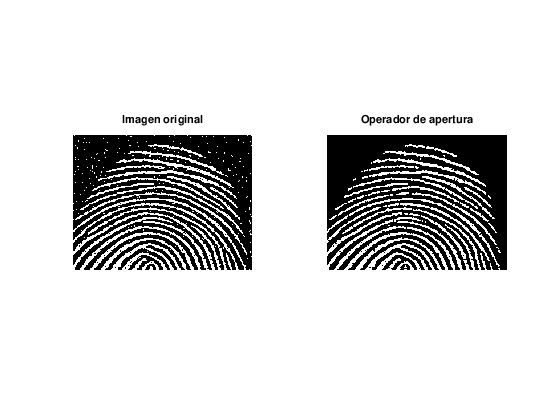

In [2]:
clc; clear; close all;
pkg load image;

A = imread('media/imagen5.jpg');
A = binaria(im2double(A));
subplot(1,2,1);
imshow(A);
title('Imagen original');

B = [0 1 0; 1 1 1; 0 1 0]; %ones(2);
% Apertura morfologica de A por B
% C1 = imerode(A,B);
% C = imdilate(C1,B);
C = imopen(A,B); % El comando de apertura de A por B
subplot(1,2,2);
imshow(C);
title('Operador de apertura');

# Algoritmos morfológicos
## Extracción de bordes
### Borde interno
\begin{equation}
B_I(A) = A - (A \ominus B)
\end{equation}

![title](media/borde-interno.png)

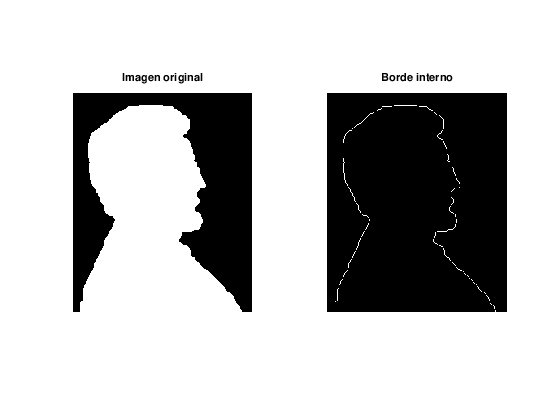

In [3]:
clc; clear; close all;
pkg load image;

A = imread('media/imagen6.jpg');
A = binaria(im2double(A));
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Elemento estructurado
B = [0 1 0; 1 1 1; 0 1 0];

% Borde interno: A - (A erosion B)
C = imerode(A,B);
D = A&~C;
 
subplot(1,2,2);
imshow(D);
title('Borde interno');

### Borde externo
\begin{equation}
B_E(A) = (A \oplus B) - A
\end{equation}

![title](media/borde-externo.png)

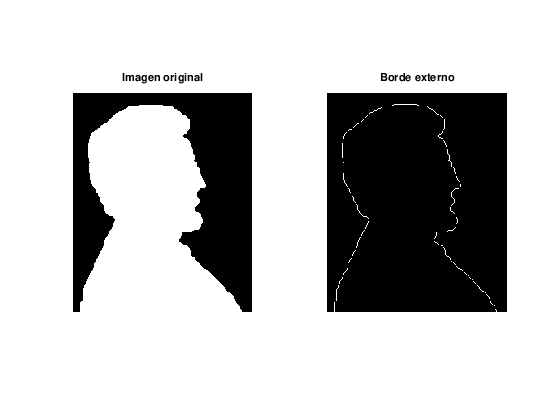

In [4]:
clc; clear; close all;
pkg load image;

A = imread('media/imagen6.jpg');
A = binaria(im2double(A));
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Elemento estructurado
B = [0 1 0; 1 1 1; 0 1 0];

% Borde externo: (A dilatacion B) - A
C = imdilate(A,B);
D = C&~A;
 
subplot(1,2,2);
imshow(D);
title('Borde externo');

###  Gradiente morfológico
\begin{equation}
B_M(A) = (A \oplus B) - (A \ominus B)
\end{equation}

![title](media/gradiente-morfologico.png)

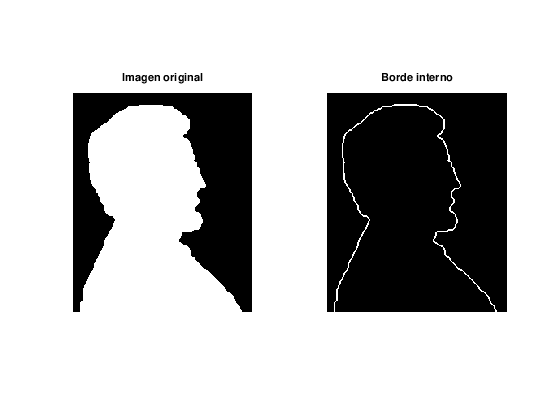

In [5]:
clc; clear; close all;
pkg load image;

A = imread('media/imagen6.jpg');
A = binaria(im2double(A));
subplot(1,2,1);
imshow(A);
title('Imagen original');

% Elemento estructurado
B = [0 1 0; 1 1 1; 0 1 0];

% Gradiente morfoligico: (A dilatacion B) - (A erosion B)
C = imdilate(A,B);
D = imerode(A,B);
E = C&~D;
 
subplot(1,2,2);
imshow(E);
title('Borde interno');

## Rellenar huecos
Sea $A$ una imagen binaria, tal que tiene un hueco que llenar

![title](media/rellenar-huecos.svg)

El método iterativo para rellenar los huecos de una imagen binaria $A$ es

\begin{equation}
X_k = (X_{k-1} \oplus B) \cap A^c
\end{equation}

donde $X_0$ es una matriz de ceros, excepto en una entrada, y esa entrada pertenece al hueco a rellenar.

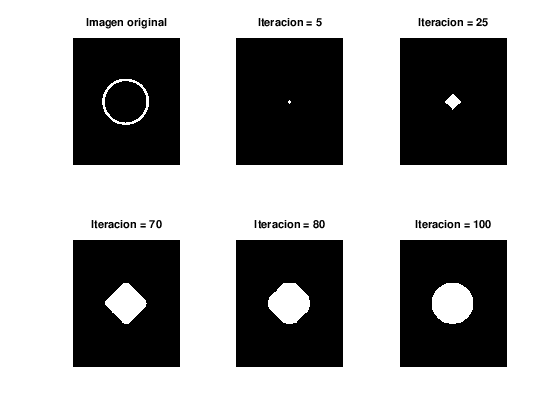

In [6]:
clc; clear; close all;
pkg load image;

A = imread('media/imagen7.jpg');
A = binaria(im2double(A));
subplot(2,3,1);
imshow(A);
title('Imagen original');

% Elemento estructurado
B = [0 1 0; 1 1 1; 0 1 0];

% Rellenar el hueco de la imagen
[m,n] = size(A);
X = zeros(m,n);
x1 = floor(m/2); y1 = floor(n/2);
X(x1,y1) = 1;

fig_iter = zeros(m,n,1,5); % Matriz para guardar ciertas iteraciones
cont = 1;
iter = 100;
for i = 1:iter
  C = imdilate(X,B);
  X = C&~A;
  
  % Se almacenan ciertas iteraciones para mostrar en una grafica
  if(i==5 || i==25 || i==70 || i==80 || i==100)
    fig_iter(:,:,:,cont) = X;
    cont = cont + 1;
  endif
endfor

% Grafica
subplot(2,3,2);
imshow(fig_iter(:,:,:,1));
title('Iteracion = 5');

subplot(2,3,3);
imshow(fig_iter(:,:,:,2));
title('Iteracion = 25');

subplot(2,3,4);
imshow(fig_iter(:,:,:,3));
title('Iteracion = 70');

subplot(2,3,5);
imshow(fig_iter(:,:,:,4));
title('Iteracion = 80');

subplot(2,3,6);
imshow(fig_iter(:,:,:,5));
title('Iteracion = 100');

## Esqueleto de una figura

Sea $A$ una imagen binaria. Para obtener el esqueleto de una figura, se utiliza la siguiente operación:

\begin{equation}
S(A) = \bigcup_{k=0}^{\overline{k}}S_k(A)=S_0(A) \cup S_1(A) \cup S_0(A) \cup \ldots \cup S_{\overline{k}}(A)
\end{equation}

donde

\begin{equation}
S_k(A) = (A \ominus kB) - (A \ominus kB) \circ B
\end{equation}

\begin{equation}
(A \ominus kB) = (\ldots ((A \ominus \underbrace{B)\ominus B)\ldots \ominus B}_{\text{k veces}})
\end{equation}

\begin{equation}
\overline{k} = max\{k/(A \ominus kB) \neq \emptyset\} \\ 
\end{equation}

\begin{equation}
\overline{k} = max\{k/S_{\overline{k}} \neq \emptyset\} \\ 
\end{equation}

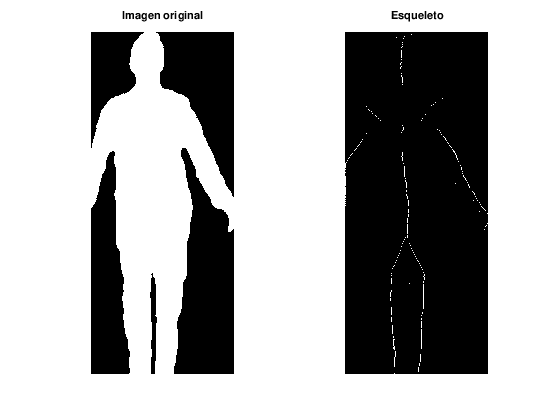

In [7]:
clc; clear; close all;
pkg load image;
A = imread('media/imagen9.jpg');
A = im2double(A);
A = binaria(A);
subplot(1,2,1);
imshow(A);
title('Imagen original');


[m,n] = size(A);
B = [0 1 0; 1 1 1; 0 1 0];
Xk = A;
k=1;
Sk_aux = A&~imopen(A,B);
while 1
  Xk = imerode(Xk,B);
  Yk = imopen(Xk,B);
  Sk = Xk&~Yk;  
  
  if Xk == 0
    break;
  endif  
  
  Sk_aux = Sk_aux|Sk;
  k+=1;
endwhile

Y = Sk_aux;
subplot(1,2,2);
imshow(Y);
title('Esqueleto')